## Práctica 5 PSO

#### Paso 1

Importar las librerias necesarias

In [4]:
import numpy as np
import random

##### Paso 2
Definir la funcion objetivo 1

In [5]:
def objective_function(x):
    return -(1 - ((11 / 2 * x) - (7 / 2))**2) * (np.cos((11 / 2 * x) - (7 / 2)) + 1) + 2

##### Paso 3
Inicializamos los parametros de la PSO

In [6]:
num_particles = 30
num_dimensions = 1
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 2.0

# Limites de la busqueda
bounds = (-10, 10)

##### Paso 4
Inicializamos las particulas y sus velocidades

In [7]:
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

p_best_position = particles.copy()
p_best_value = np.array([objective_function(x) for x in particles])
g_best_position = p_best_position[np.argmin(p_best_value)]
g_best_value = np.min(p_best_value)

history_positions = []

##### Paso 5
Implementar el bucle principal del algoritmo

In [8]:
for t in range(num_iterations):
    for i in range(num_particles):
        fitness = objective_function(particles[i])

        # Actualizar la mejor pos individual
        if fitness < p_best_value[i]:
            p_best_value[i] = fitness
            p_best_position[i] = particles[i].copy()

        # Actualizar la mejor pos global
        if fitness < g_best_value:
            g_best_value = fitness
            g_best_position = particles[i].copy()

    # Actualizar velocidades y posiciones
    for i in range(num_particles):
        r1 = random.random()
        r2 = random.random()

        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (p_best_position[i] - particles[i])
                         + c2 * r2 * (g_best_position - particles[i]))

        particles[i] = particles[i] + velocities[i]

        # Respetar los limites de la busqueda
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])

    history_positions.append(particles.copy())
    print(f'Iteracion: {t+1}/{num_iterations}, Mejor valor global: {g_best_value}')

print(f'Mejor posicion encontrada: {g_best_position}, con valor: {g_best_value}')

Iteracion: 1/100, Mejor valor global: 1.449248941627882
Iteracion: 2/100, Mejor valor global: [0.4443526]
Iteracion: 3/100, Mejor valor global: [0.1079462]
Iteracion: 4/100, Mejor valor global: [0.00263889]
Iteracion: 5/100, Mejor valor global: [0.00263889]
Iteracion: 6/100, Mejor valor global: [0.00074387]
Iteracion: 7/100, Mejor valor global: [0.00074387]
Iteracion: 8/100, Mejor valor global: [0.00016475]
Iteracion: 9/100, Mejor valor global: [0.00016475]
Iteracion: 10/100, Mejor valor global: [0.00016475]
Iteracion: 11/100, Mejor valor global: [0.00016475]
Iteracion: 12/100, Mejor valor global: [0.00016475]
Iteracion: 13/100, Mejor valor global: [0.00016475]
Iteracion: 14/100, Mejor valor global: [0.00016475]
Iteracion: 15/100, Mejor valor global: [0.00016475]
Iteracion: 16/100, Mejor valor global: [6.61014106e-05]
Iteracion: 17/100, Mejor valor global: [1.20086536e-05]
Iteracion: 18/100, Mejor valor global: [1.20086536e-05]
Iteracion: 19/100, Mejor valor global: [2.04249301e-06]
It

##### Paso 5. Graficamos

In [9]:
x_values = np.linspace(-10, 10, 400)
y_values = objective_function(x_values)

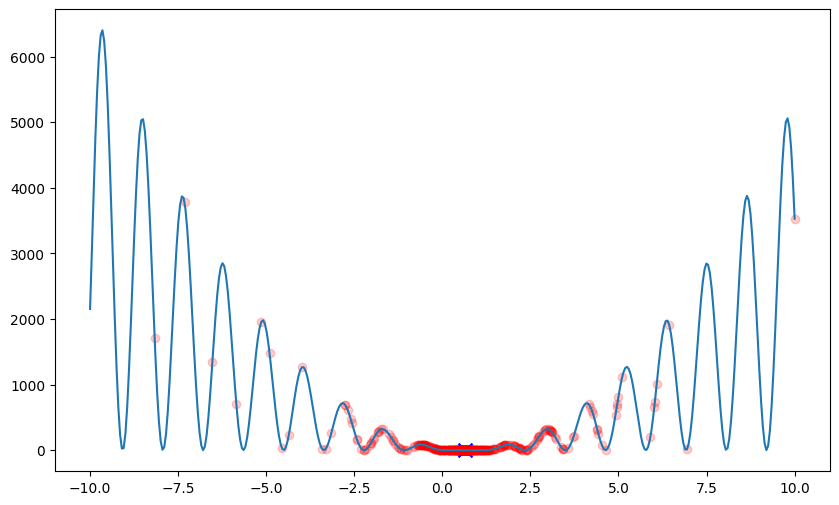

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x^2")

plt.scatter([g_best_position], [objective_function(g_best_position)], color="blue", marker="x", s=100, label="Mejor posicion")

for positions in history_positions:
    plt.scatter(positions, objective_function(positions), color="red", alpha=0.2)

#### Ahora, realicemos lo mismo pero para la siguiente función

In [11]:
def objective_function_(x):
    return (1 - ((11 / 2 * x) - (7 / 2))**2) * (np.cos((11 / 2 * x) - (7 / 2)) + 1) + 2

##### Paso 6
Inicializamos los parametros de la PSO

In [12]:
num_particles = 30
num_dimensions = 1
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 2.0

# Limites de la busqueda
bounds = (-10, 10)

##### Paso 7
Inicializamos las particulas y sus velocidades

In [13]:
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

p_best_position = particles.copy()
p_best_value = np.array([objective_function_(x) for x in particles])
g_best_position = p_best_position[np.argmin(p_best_value)]
g_best_value = np.min(p_best_value)

history_positions = []

##### Paso 8
Implementar el bucle principal del algoritmo

In [19]:
for t in range(num_iterations):
    for i in range(num_particles):
        fitness = objective_function_(particles[i])

        # Actualizar la mejor pos individual
        if fitness > p_best_value[i]:
            p_best_value[i] = fitness
            p_best_position[i] = particles[i].copy()

        # Actualizar la mejor pos global
        if fitness > g_best_value:
            g_best_value = fitness
            g_best_position = particles[i].copy()

    # Actualizar velocidades y posiciones
    for i in range(num_particles):
        r1 = random.random()
        r2 = random.random()

        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (p_best_position[i] - particles[i])
                         + c2 * r2 * (g_best_position - particles[i]))

        particles[i] = particles[i] + velocities[i]

        # Respetar los limites de la busqueda
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])

    history_positions.append(particles.copy())
    print(f'Iteracion: {t+1}/{num_iterations}, Mejor valor global: {g_best_value}')

print(f'Mejor posicion encontrada: {g_best_position}, con valor: {g_best_value}')

Iteracion: 1/100, Mejor valor global: [-6395.3120118]
Iteracion: 2/100, Mejor valor global: [-6196.4315355]
Iteracion: 3/100, Mejor valor global: [-5599.68772545]
Iteracion: 4/100, Mejor valor global: [-4161.43348119]
Iteracion: 5/100, Mejor valor global: [-1082.9486865]
Iteracion: 6/100, Mejor valor global: [0.63951889]
Iteracion: 7/100, Mejor valor global: [0.63951889]
Iteracion: 8/100, Mejor valor global: [1.95783021]
Iteracion: 9/100, Mejor valor global: [1.95783021]
Iteracion: 10/100, Mejor valor global: [1.96218786]
Iteracion: 11/100, Mejor valor global: [1.96218786]
Iteracion: 12/100, Mejor valor global: [1.96218786]
Iteracion: 13/100, Mejor valor global: [1.96218786]
Iteracion: 14/100, Mejor valor global: [1.99976989]
Iteracion: 15/100, Mejor valor global: [1.99976989]
Iteracion: 16/100, Mejor valor global: [1.99976989]
Iteracion: 17/100, Mejor valor global: [1.99976989]
Iteracion: 18/100, Mejor valor global: [1.99976989]
Iteracion: 19/100, Mejor valor global: [1.99976989]
Iter

#### Paso 9, graficamos

In [20]:
x_values = np.linspace(-10, 10, 400)
y_values = objective_function_(x_values)

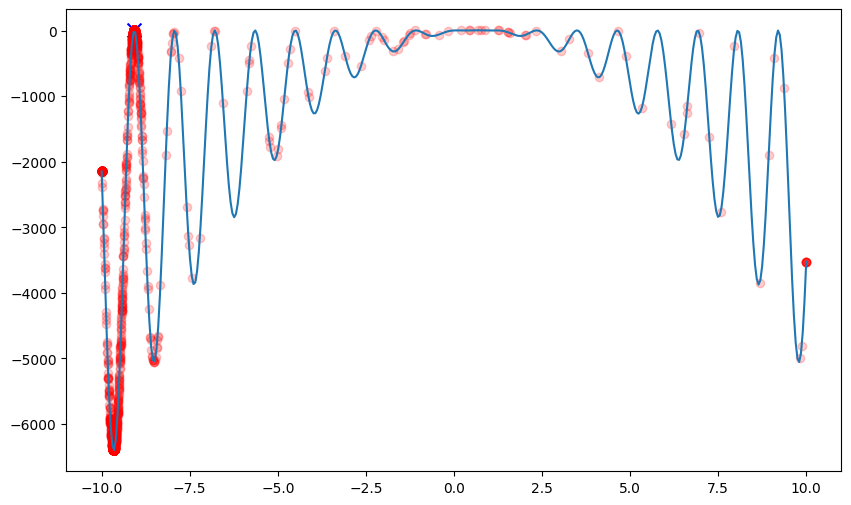

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x^2")

plt.scatter([g_best_position], [objective_function_(g_best_position)], color="blue", marker="x", s=100, label="Mejor posicion")

for positions in history_positions:
    plt.scatter(positions, objective_function_(positions), color="red", alpha=0.2)

### Conclusiones

El PSO es un algoritmo de uptimización basado en la simulación de la conducta social de organismos, como bancos de peces. En esta práctica implementamos PSO para buscar el óptimo global (en el primer ejemplo buscando el mínimo y en el segundo ejemplo el máximo) de una función en 2D